In [85]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
import squarify
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
import plotly.express as px

In [11]:
#importing cleaned csv file
airbnb = pd.read_csv(r"C:\Users\cleme\Desktop\IronHack\Project 4\airbnb_clean2.csv")

# Repartition of offers between NYC boroughs

In Matplotlib

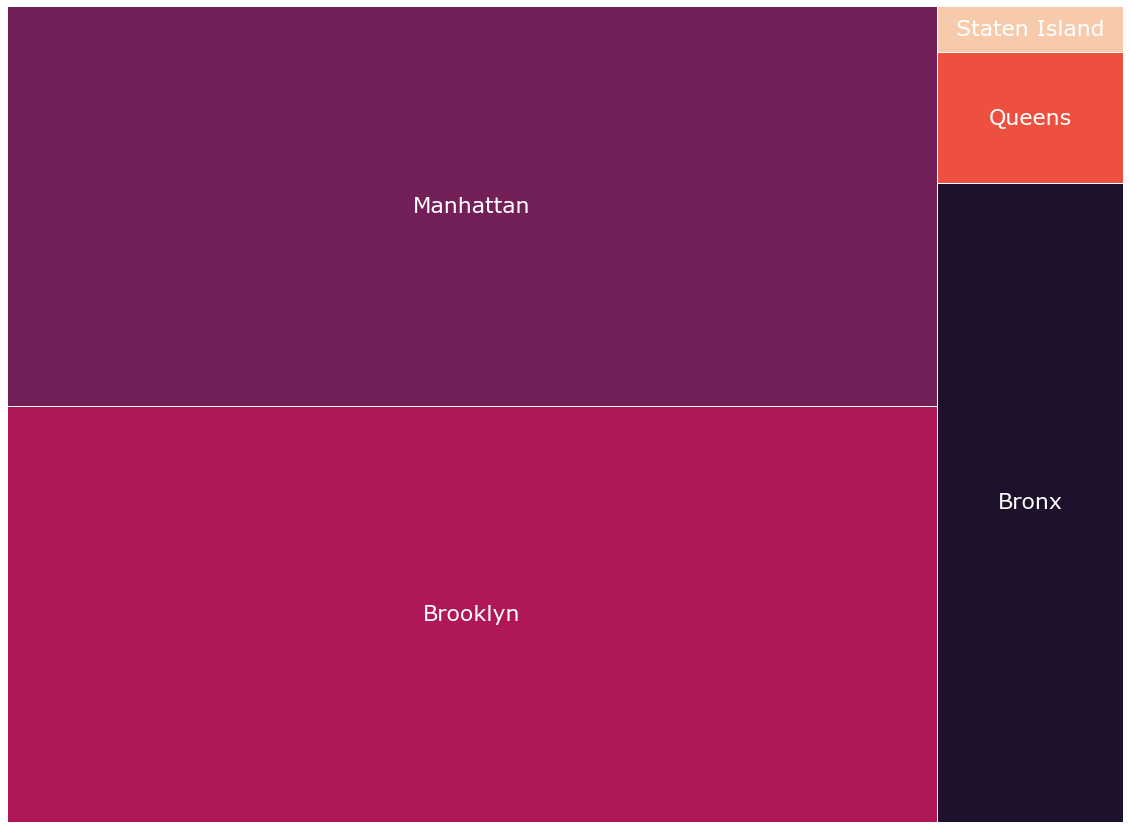

In [148]:
# Create a data frame with fake data
#colors = ["blue", "red", "green","violet", "yellow"]
#label = ["Manhattan", "Brooklyn", "Queens","Bronx", "Staten Island"]
# plot it
squarify.plot(sizes=airbnb['neighbourhood group'].value_counts(), label=airbnb['neighbourhood group'].unique())
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['font.size'] = 22
plt.rcParams['text.color'] = 'white'

plt.axis('off')
plt.show()

In seaborn

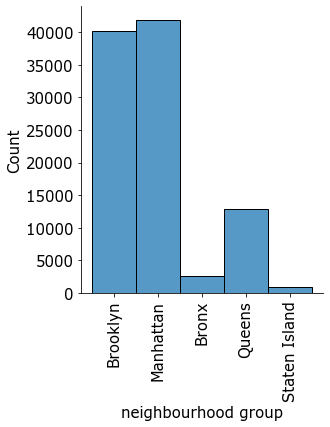

In [23]:
sns.displot(data=airbnb, x="neighbourhood group")
plt.xticks(rotation=90)
plt.rcParams['font.size'] = 15


# Repartition of Room Type

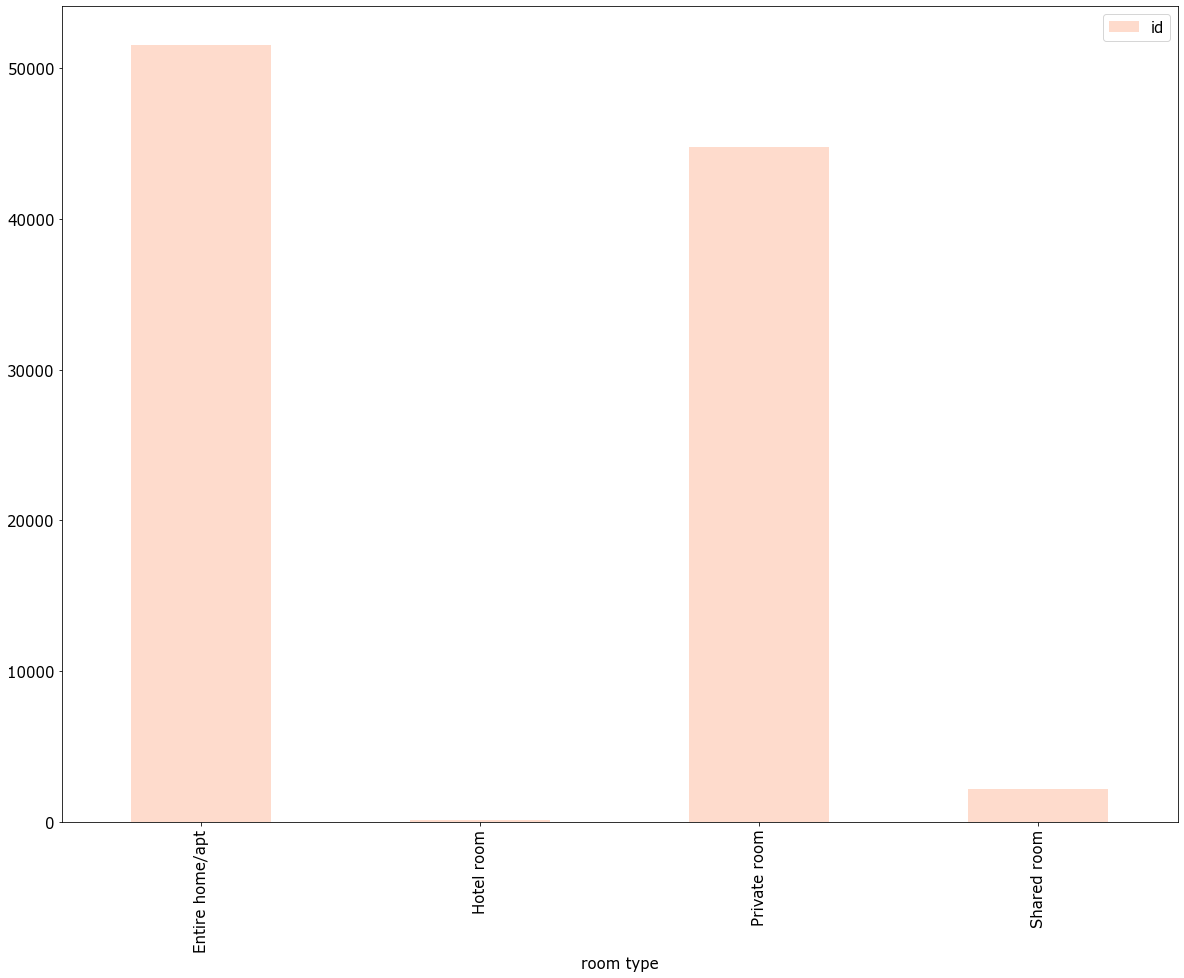

In [29]:
airb = airbnb[["room type", "id"]].groupby(["room type"]).agg("count")
airb.plot.bar(color=colors)
colors = sns.color_palette('Reds')

([<matplotlib.patches.Wedge at 0x28230f4bf40>,
 [Text(-0.07836269758395983, 1.0972052167335722, 'Entire home/apt'),
  Text(-0.0014545193352978377, -1.0999990383511722, 'Private room'),
  Text(1.0968034724139641, -0.08379822731222165, 'Shared room'),
  Text(1.0999927427481653, -0.003995735397756612, 'Hotel room')],
 [Text(-0.04274328959125081, 0.5984755727637665, '52%'),
  Text(-0.0007933741828897295, -0.5999994754642757, '45%'),
  Text(0.5982564394985258, -0.045708123988484534, '2%'),
  Text(0.5999960414989992, -0.00217949203513997, '0%')])

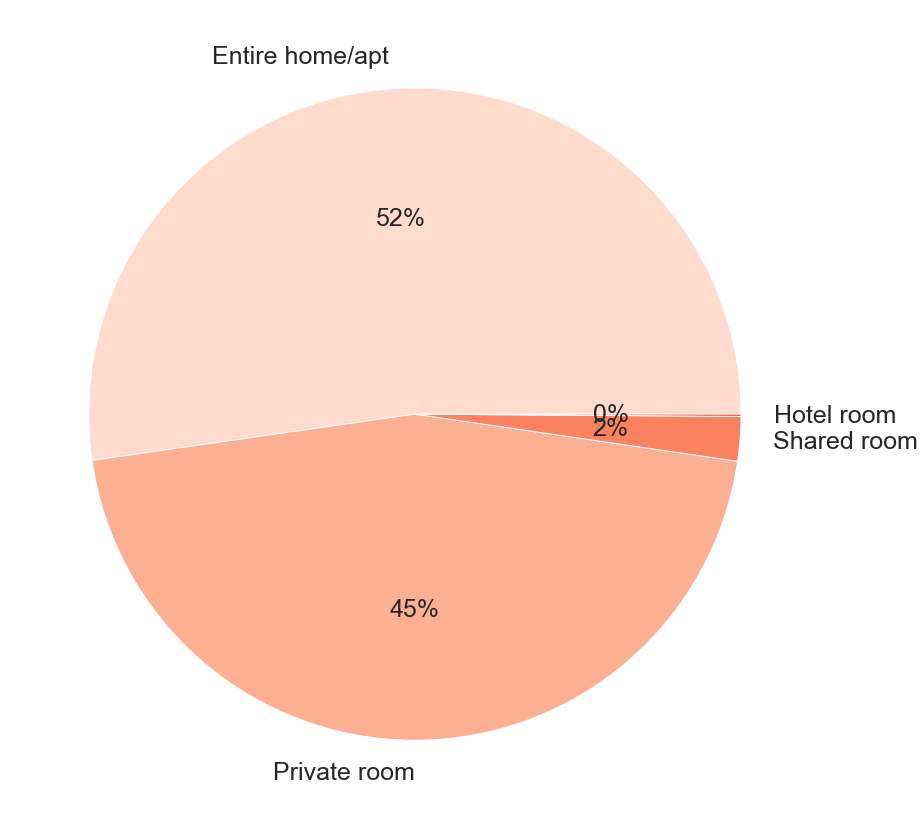

In [102]:
#define data
plot = airbnb['room type'].value_counts()
plot= pd.DataFrame(plot)
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['font.size'] = 25
#define data
data = plot['room type']
labels = plot.index

#define Seaborn color palette to use
colors = sns.color_palette('Reds')

#create pie chart
pie = plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
pie

# Mean / Average price per Neighbourhood Versus Mean/Average review rate

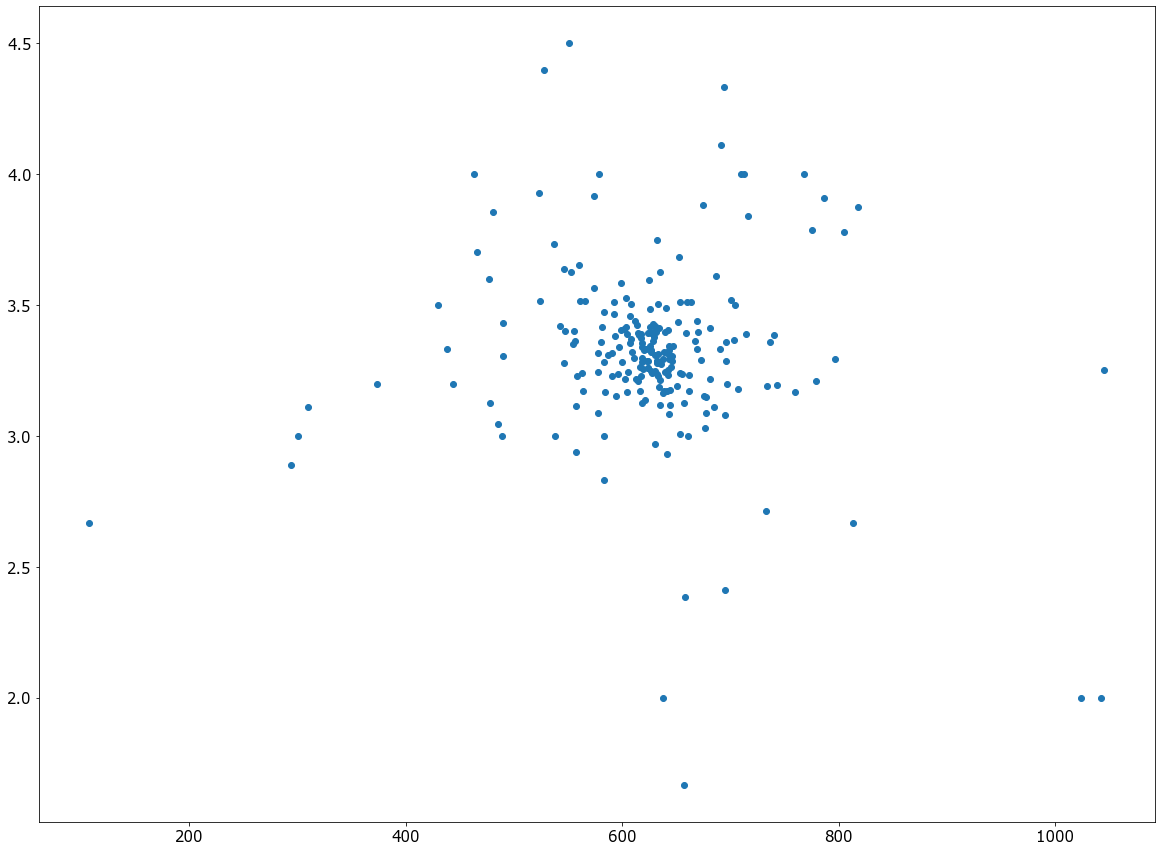

In [31]:
x = airbnb[['price', 'neighbourhood']].groupby(['neighbourhood']).agg('mean')
y = airbnb[['review rate number', 'neighbourhood']].groupby(['neighbourhood']).agg('mean')

plt.scatter(x, y)
plt.show()

<AxesSubplot:xlabel='price', ylabel='review rate number'>

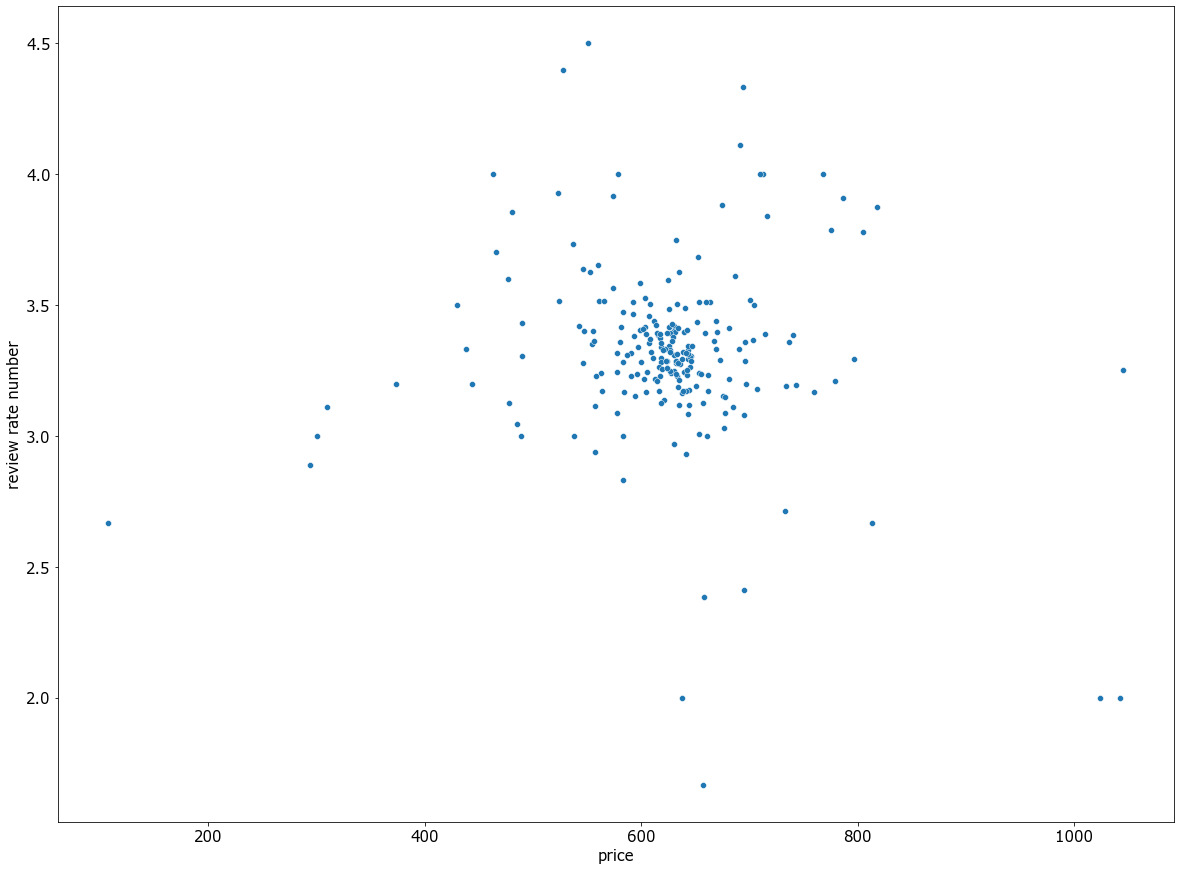

In [35]:
sns.scatterplot(data=airbnb, x=airbnb.groupby('neighbourhood')['price'].mean(), y=airbnb.groupby('neighbourhood')['review rate number'].mean())

# Price relative to construction date

<AxesSubplot:xlabel='Construction year', ylabel='price'>

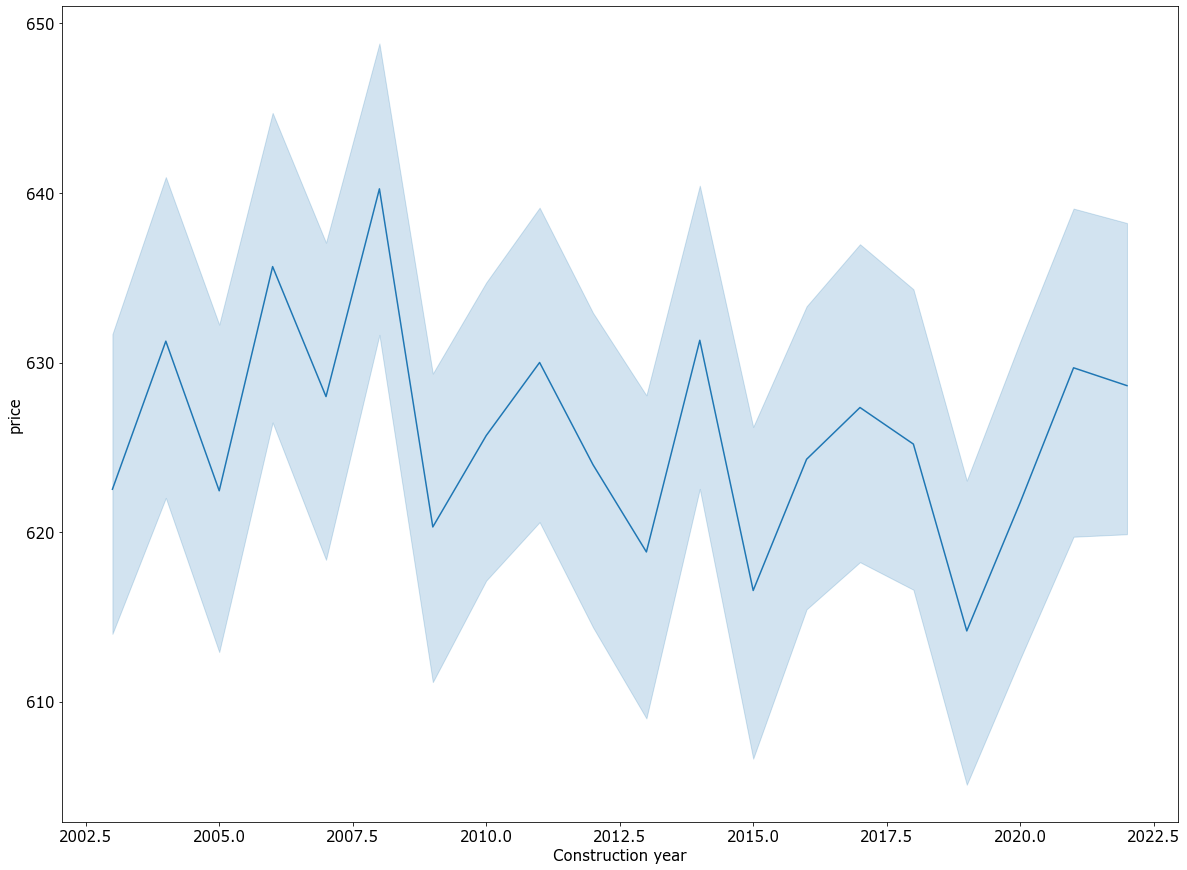

In [55]:
sns.lineplot(x=airbnb['Construction year'],y=airbnb['price'])

<AxesSubplot:xlabel='Construction year'>

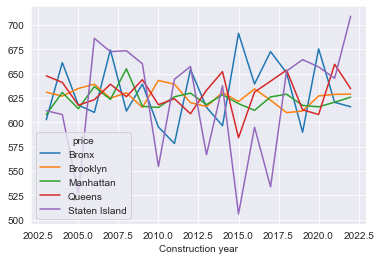

In [59]:
df = airbnb.groupby(['Construction year','neighbourhood group'])['price'].mean()
df = df.unstack(level='neighbourhood group')
df.columns.name = 'price'
df.plot()

# Distribution of availability by borough

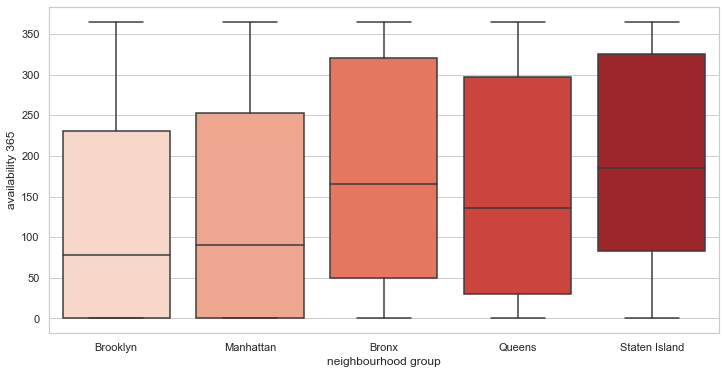

In [70]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.set_theme(style='whitegrid')
sns.set_palette("Reds")
ax = sns.boxplot(x='neighbourhood group', y='availability 365', data=airbnb, palette='Reds')

<AxesSubplot:title={'center':'availability 365'}, xlabel='neighbourhood group'>

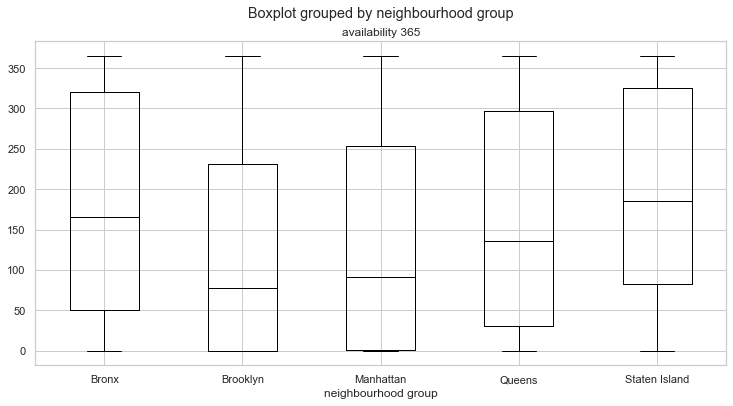

In [96]:
airbnb.boxplot(by ='neighbourhood group', column =['availability 365'], color='black')

# Distribution of availability by borough

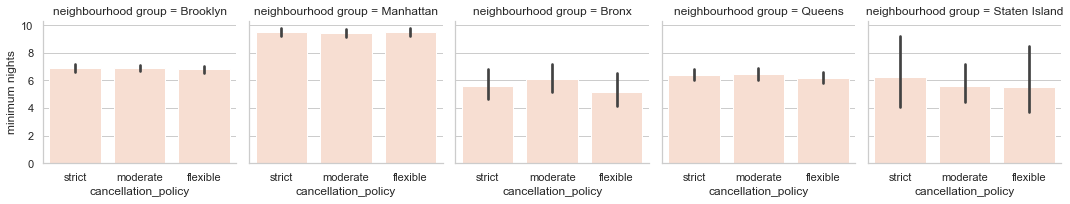

In [104]:
g = sns.FacetGrid(airbnb, col="neighbourhood group")
g.map(sns.barplot, "cancellation_policy", "minimum nights", order=["strict", "moderate", "flexible"])

<AxesSubplot:xlabel='neighbourhood group'>

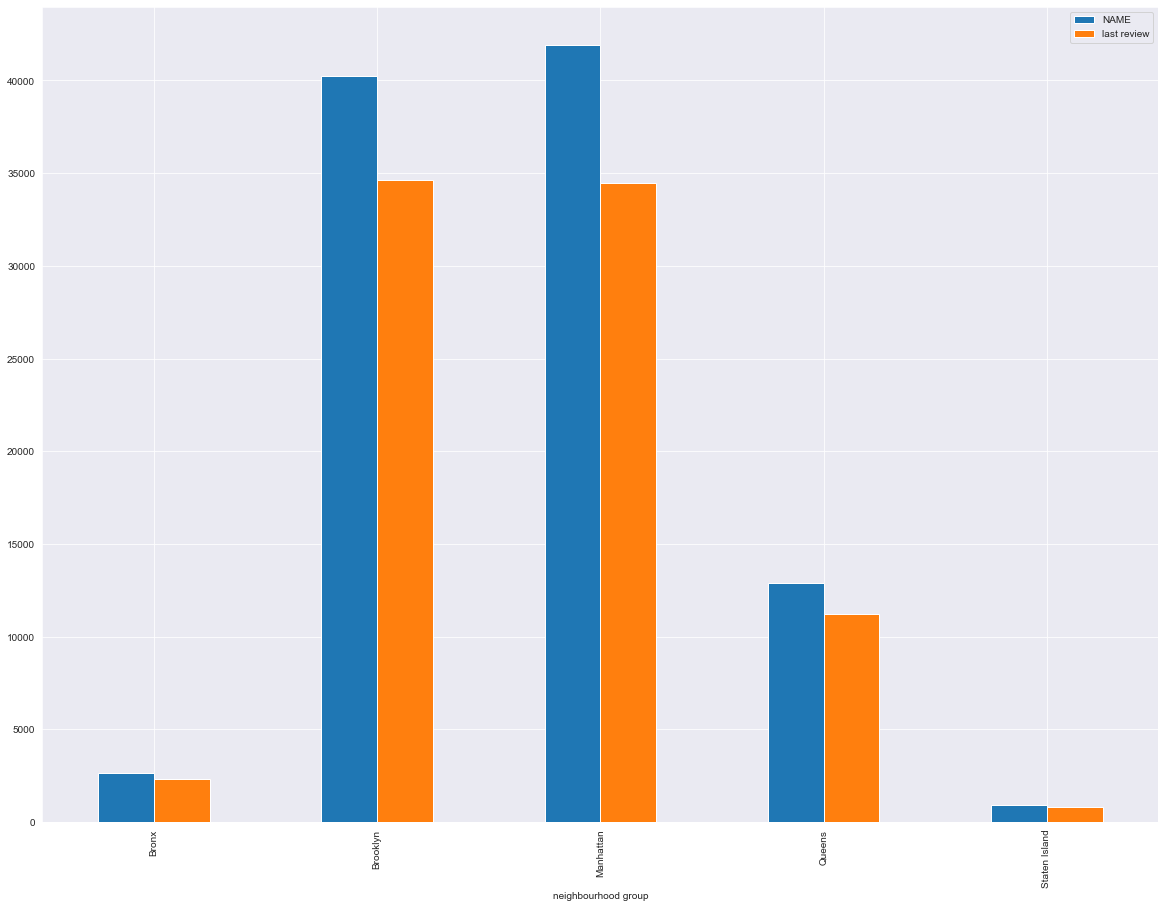

In [68]:
airb = airbnb[['NAME', 'last review', 'neighbourhood group']].groupby(['neighbourhood group']).agg('count')
airb.plot.bar()

<AxesSubplot:xlabel='neighbourhood group', ylabel='availability 365'>

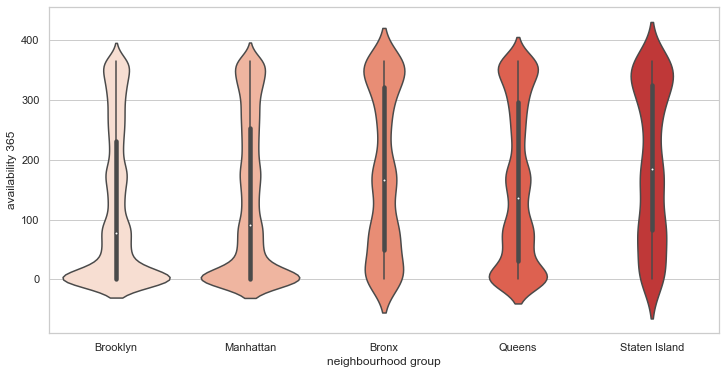

In [128]:
sns.violinplot(x = airbnb['neighbourhood group'], y = airbnb['availability 365'])

<AxesSubplot:xlabel='price', ylabel='Count'>

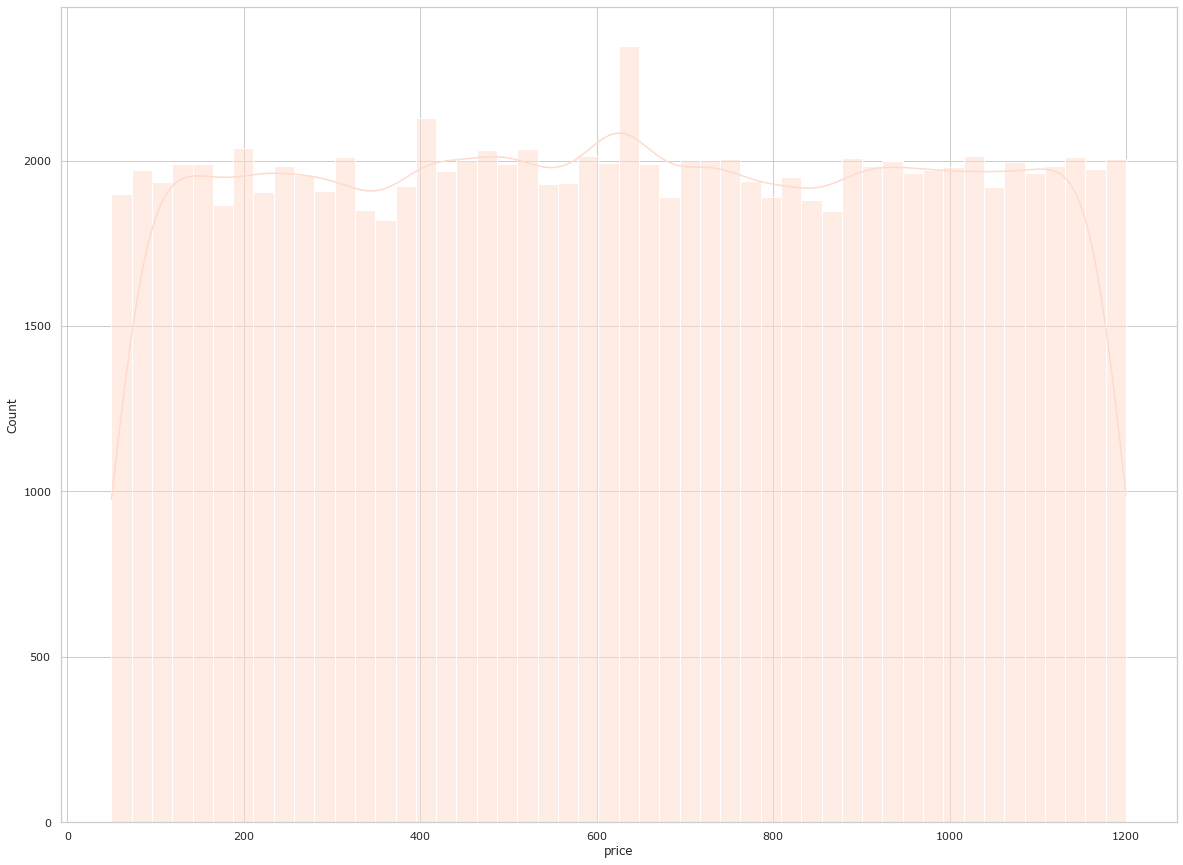

In [152]:
sns.histplot(data=airbnb, x="price", kde=True, bins=50)

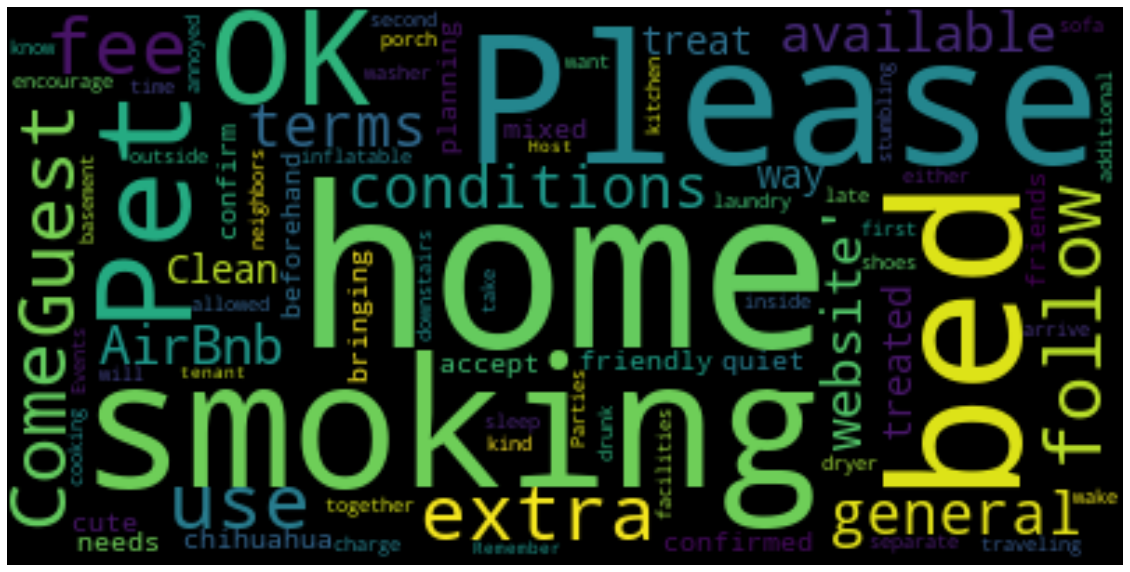

In [171]:
text=airbnb['house_rules'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

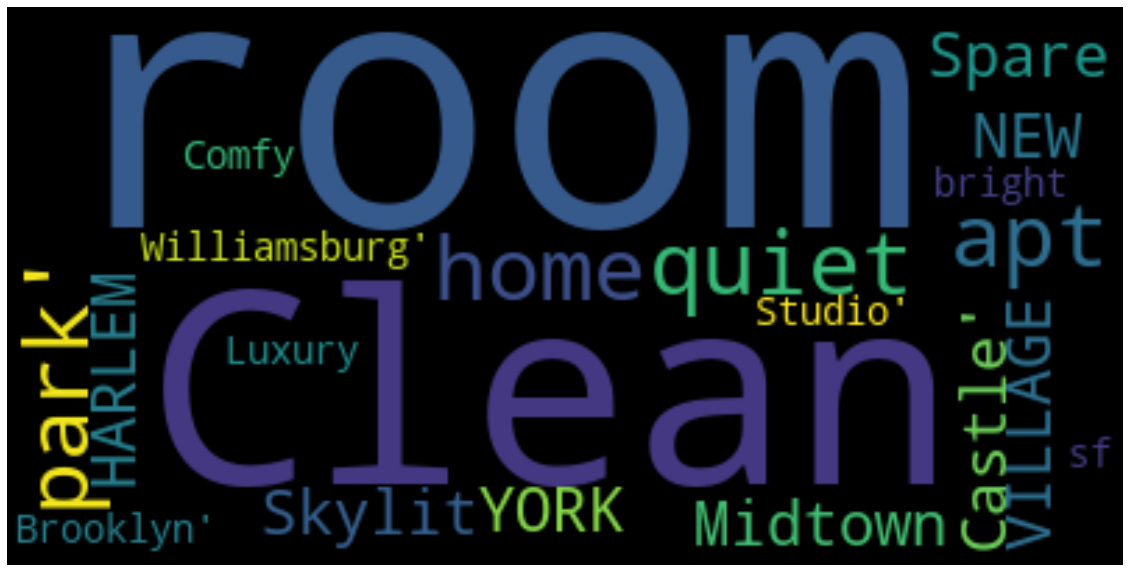

In [173]:
text=airbnb['NAME'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [17]:
airbnb.columns

Index(['Unnamed: 0', 'id', 'NAME', 'host id', 'host_identity_verified',
       'neighbourhood group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'host_identity_verified_encode',
       'neighbourhood group_encode', 'neighbourhood_encode',
       'instant_bookable_encode', 'cancellation_policy_encode',
       'room type_encode'],
      dtype='object')

In [12]:
airbnb['host_identity_verified_encode']=encoder.fit_transform(airbnb['host_identity_verified'])
airbnb['neighbourhood group_encode']=encoder.fit_transform(airbnb['neighbourhood group'])
airbnb['neighbourhood_encode']=encoder.fit_transform(airbnb['neighbourhood'])
airbnb['instant_bookable_encode']=encoder.fit_transform(airbnb['instant_bookable'])
airbnb['cancellation_policy_encode']=encoder.fit_transform(airbnb['cancellation_policy'])
airbnb['room type_encode']=encoder.fit_transform(airbnb['room type'])

<AxesSubplot:>

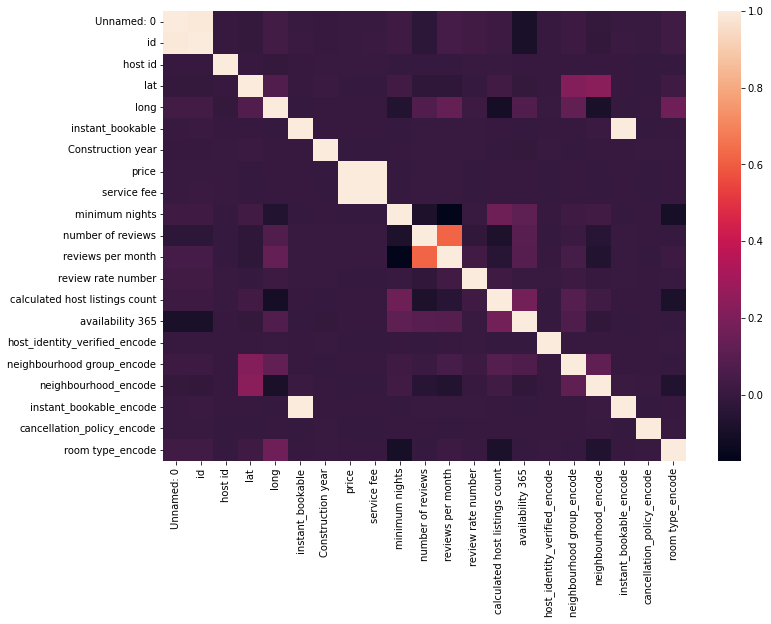

In [36]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(airbnb.corr())

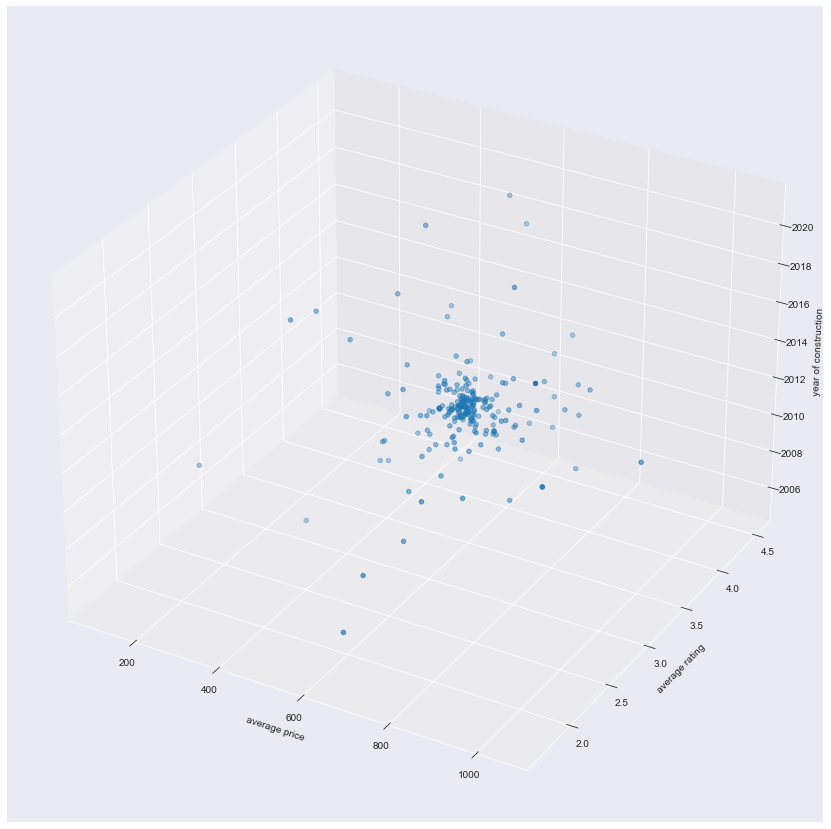

In [65]:
x1 = airbnb.groupby('neighbourhood')['price'].mean()
y1 = airbnb.groupby('neighbourhood')['review rate number'].mean()
z1 = y=airbnb.groupby('neighbourhood')['Construction year'].mean()
axes = plt.axes(projection='3d')
axes.scatter3D(x1, y1, z1)

axes.set_xlabel('average price')
axes.set_ylabel('average rating')
axes.set_zlabel('year of construction')
plt.rcParams["figure.figsize"] = (20,15)
plt.show()

In [88]:
radar = airbnb[["price", "service fee", "availability 365", "number of reviews", "neighbourhood group"]].groupby(['neighbourhood group']).agg("mean")

In [89]:
radar.head()

,price,service fee,availability 365,number of reviews
neighbourhood group,,,,
Bronx,630.334611,125.980482,175.954357,31.007167
Brooklyn,626.776650,125.335290,122.239376,28.174628
Manhattan,623.489922,124.688112,133.850008,23.588890
Queens,629.974843,126.024934,157.940169,33.386654
Staten Island,625.288354,125.074552,195.739505,34.800861


KeyError: 'neighbourhood group'

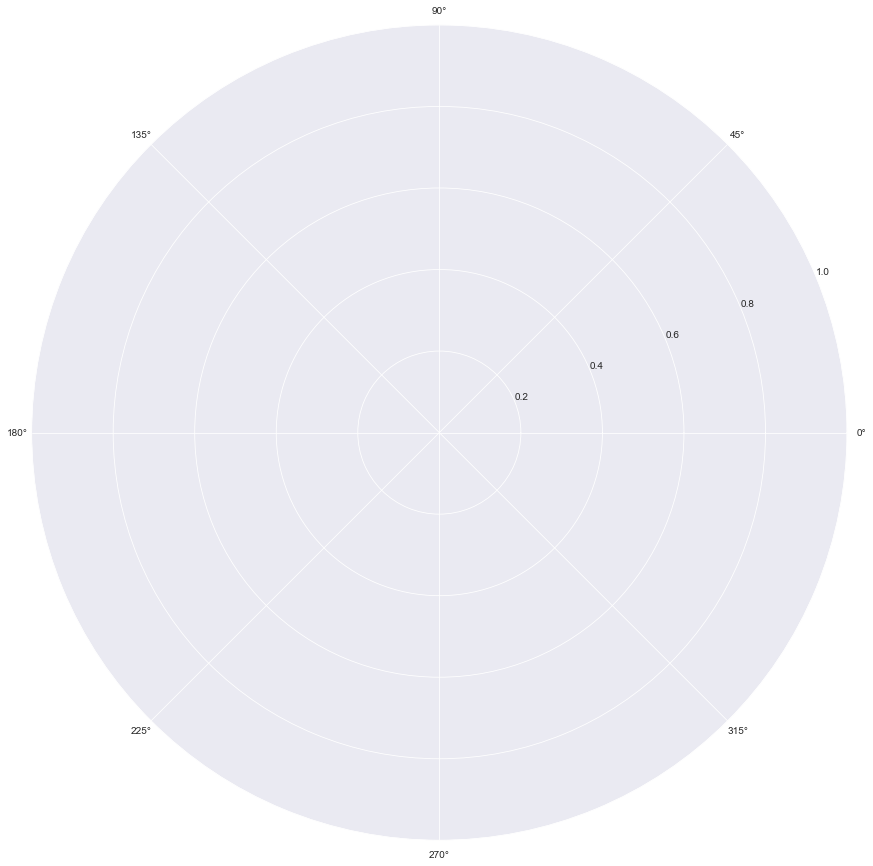

In [100]:
#df = pd.DataFrame({'Col A': ['home', 'other', 'used', 'new', 'service'],
#                   'Col B': [6.797, 3.243, 12.567, 8.985, 1.345]})
fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(radar) + 1) / float(len(radar)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = radar['neighbourhood group'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], radar.columns, color='grey', size=12)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Title")
plt.show()